![Los Angeles skyline](la_skyline.jpg)

## Introduction: Crime Analysis for the LAPD

Los Angeles, California – the City of Angels – is known for its vibrant entertainment industry, beautiful landscapes, and sprawling coastline. However, like any large metropolitan area, it also faces its share of challenges, including a high volume of crime. In order to tackle these challenges effectively, the Los Angeles Police Department (LAPD) is seeking insights into patterns of criminal behavior to better allocate resources across the city.

As a data analyst, you have been tasked with analyzing crime data to identify trends and provide actionable insights. Your findings will play a crucial role in helping the LAPD understand the patterns of criminal activities, the areas most affected, and the factors that might contribute to criminal behavior. By effectively analyzing the data, you will assist in making informed decisions to improve safety and resource allocation in the City of Angels.

In this notebook, we will explore the available crime data, uncover trends, and visualize key findings that will assist the LAPD in their mission to enhance public safety in Los Angeles.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [1]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


In [2]:
crimes['hours']=crimes['TIME OCC'].str[:2]
crime_by_hours = crimes.groupby('hours')['DR_NO'].agg('count')
crime_by_hours=crime_by_hours.sort_values(ascending=False)
peak_crime_hour= crime_by_hours.idxmax()
peak_crime_hour = int(peak_crime_hour)
peak_crime_hour

12

In [4]:
# Filter crimes that occurred between 10 PM to 4 AM
crimes_from_10pm_4am = crimes[
    ((crimes['TIME OCC'] >= '2200') & (crimes['TIME OCC'] <= '2359')) |  # 10 PM to midnight
    ((crimes['TIME OCC'] >= '0000') & (crimes['TIME OCC'] <= '0359'))    # Midnight to 4 AM
]
crimes_from_10pm_4am.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,hours
8,231207476,2023-02-27,2020-08-15,0001,77th Street,BURGLARY,72,M,B,NaN,Invest Cont,8800 HAAS AV,00
10,221711184,2022-06-15,2020-05-15,0155,Devonshire,THEFT OF IDENTITY,27,M,B,NaN,Invest Cont,8300 WHITE OAK AV,01
30,221314362,2022-07-11,2020-04-07,0001,Newton,THEFT OF IDENTITY,53,F,H,NaN,Invest Cont,1600 E OLYMPIC BL,00
33,231307252,2023-03-03,2020-07-05,2305,Newton,THEFT OF IDENTITY,22,F,B,NaN,Invest Cont,6600 S BROADWAY,23
36,221614254,2022-11-13,2020-01-01,0001,Foothill,THEFT OF IDENTITY,22,F,H,NaN,Invest Cont,10200 TELFAIR AV,00


In [5]:
higgest_crimes_area_from_10pm_4am = crimes_from_10pm_4am.groupby('AREA NAME')['DR_NO'].agg('count')
peak_night_crime_location=higgest_crimes_area_from_10pm_4am.sort_values(ascending=False)
peak_night_crime_location = peak_night_crime_location.idxmax()
peak_night_crime_location

'Central'

In [6]:
def age_groups(age):
    if 0< age<=17:
        return "0-17"
    elif 18 <= age <= 25:
        return "18-25"
    elif 26 <= age <= 34:
        return "26-34"
    elif 35 <= age <= 44:
        return "35-44"
    elif 45 <= age <= 54:
        return "45-54"
    elif 55 <= age <= 64:
        return "55-64"
    else:
        return '65+'

In [7]:
crimes['Age Group'] = crimes['Vict Age'].apply(age_groups)
victim_ages = crimes['Age Group'].value_counts().to_dict()
victim_ages = pd.Series(victim_ages)
victim_ages

26-34    47470
35-44    42157
45-54    28353
18-25    28291
55-64    20169
65+      14747
0-17      4528
dtype: int64

## 1. Total Number of Crimes:

In [22]:
# Total number of crimes
total_crimes = crimes['DR_NO'].nunique()
print(f"Total Crimes: {total_crimes}")

Total Crimes: 185715


## 2. Total Number of Crimes by Status:

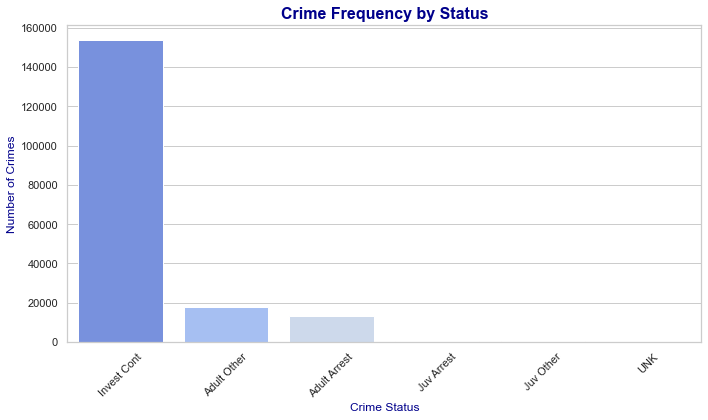

In [33]:
status_counts = crimes['Status Desc'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=status_counts.index, y=status_counts.values, palette='coolwarm')
plt.title('Crime Frequency by Status', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Crime Status', fontsize=12, color='darkblue')
plt.ylabel('Number of Crimes', fontsize=12, color='darkblue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Crime_Distribution_by_Status.png', format='png')

plt.show()

## 4. Crime Frequency by Hour of the Day:

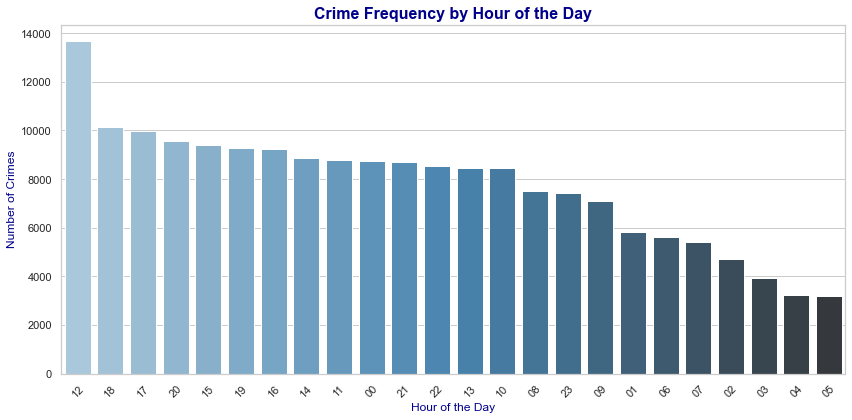

In [34]:
plt.figure(figsize=(12, 6))
sns.barplot(x=crime_by_hours.index, y=crime_by_hours.values, palette='Blues_d')
plt.title('Crime Frequency by Hour of the Day', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Hour of the Day', fontsize=12, color='darkblue')
plt.ylabel('Number of Crimes', fontsize=12, color='darkblue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Crime_Distribution_by_Victim_Hour_of_the_Day.png', format='png')

plt.show()


## 5. Crime Distribution by Victim Age Group:

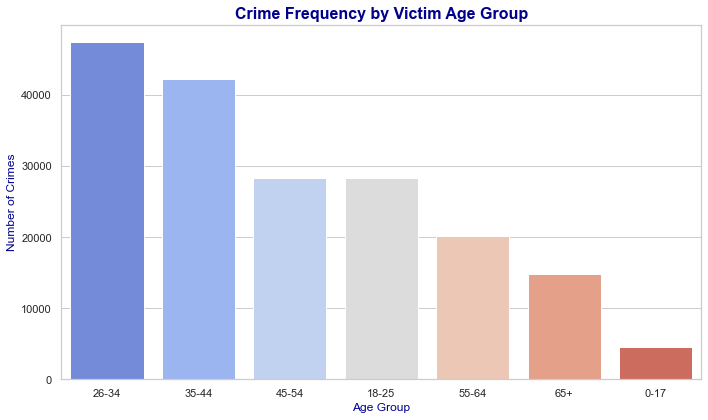

In [35]:
plt.figure(figsize=(10, 6))
sns.barplot(x=victim_ages.index, y=victim_ages.values, palette='coolwarm')
plt.title('Crime Frequency by Victim Age Group', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Age Group', fontsize=12, color='darkblue')
plt.ylabel('Number of Crimes', fontsize=12, color='darkblue')
plt.tight_layout()
plt.savefig('Crime_Distribution_by_Victim_Age_Group.png', format='png')

plt.show()

## 6. Crime Distribution by Victim Sex:

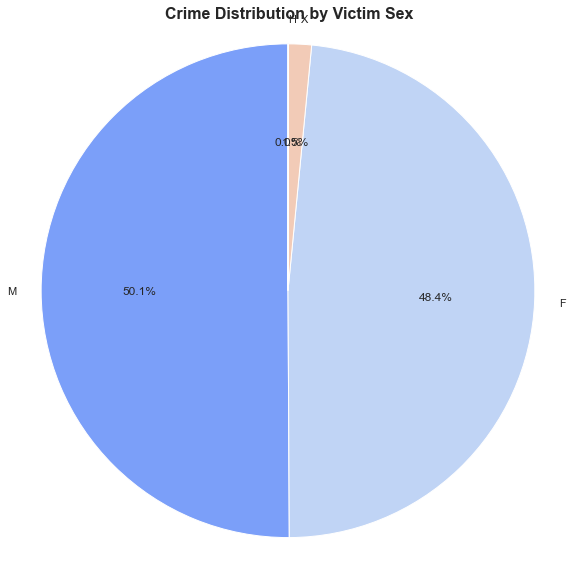

In [36]:
sex_counts = crimes['Vict Sex'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('coolwarm', len(sex_counts)))
plt.title('Crime Distribution by Victim Sex', fontsize=16, fontweight='bold')
plt.axis('equal')  
plt.tight_layout()
plt.savefig('Crime_Distribution_by_Victim_Sex.png', format='png')

plt.show()


## 7. Crime Frequency by Area

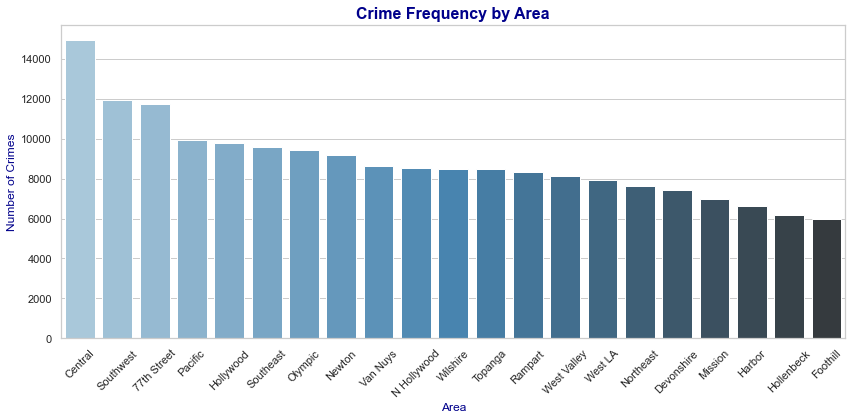

In [37]:
area_counts = crimes['AREA NAME'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=area_counts.index, y=area_counts.values, palette='Blues_d')
plt.title('Crime Frequency by Area', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Area', fontsize=12, color='darkblue')
plt.ylabel('Number of Crimes', fontsize=12, color='darkblue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Crime_Frequency_by_Area.png', format='png')

plt.show()


## 8. Crime Trend Over Time:

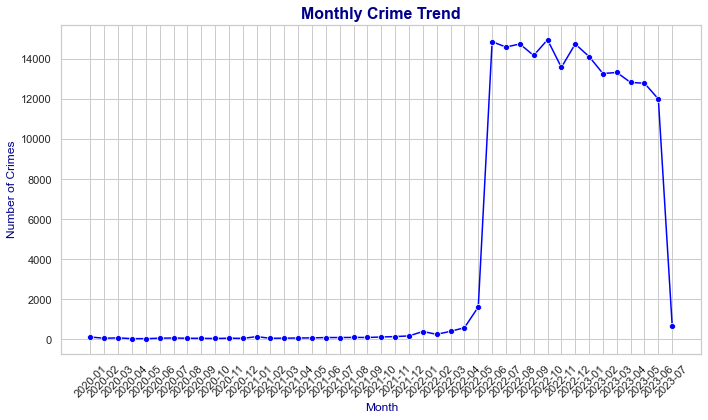

In [38]:
# Convert Date columns to datetime
crimes['DATE OCC'] = pd.to_datetime(crimes['DATE OCC'])
crimes['month'] = crimes['DATE OCC'].dt.to_period('M')

monthly_crime_trend = crimes.groupby('month')['DR_NO'].agg('count')

plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_crime_trend.index.astype(str), y=monthly_crime_trend.values, marker='o', color='blue')
plt.title('Monthly Crime Trend', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Month', fontsize=12, color='darkblue')
plt.ylabel('Number of Crimes', fontsize=12, color='darkblue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Crime_Trend_Over_Time.png', format='png')
plt.show()
